<a href="https://colab.research.google.com/github/elieric/is843/blob/master/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D.C. Residential Properties Dataset Analysis
### Team: Big Daddy Data

**Data Source**:

Dataset was downloaded from https://www.kaggle.com/christophercorrea/dc-residential-properties

In [1]:
# uncomment below to run Spark in Colab 

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.2/spark-2.4.2-bin-hadoop2.7.tgz
!tar xf spark-2.4.2-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.2-bin-hadoop2.7"

import findspark
findspark.init("/content/spark-2.4.2-bin-hadoop2.7")
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sql("select 'World' as Hello").show()

+-----+
|Hello|
+-----+
|World|
+-----+



In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.2-bin-hadoop2.7"

import findspark
findspark.init("/content/spark-2.4.2-bin-hadoop2.7")

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sql("select 'World' as Hello").show()

+-----+
|Hello|
+-----+
|World|
+-----+



In [50]:
!wget -q https://github.com/elieric/is843/raw/master/DC_Properties.csv
df=spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("DC_Properties.csv")
print('done')

done


**Introduction**


Dataset ready for analysis showing real property information, including most recent sales price as of July 2018, for properties located Washington, D.C.

The source of the data is Open Data DC{1}, and the dataset utilized here, DC_Property_data.csv, was created by merging three OpenData.DC.gov source files: raw_residential_data.csv; raw_condominium_data.csv; & raw_address_points.csv.{2}

{1} https://opendata.dc.gov/ {2} https://www.kaggle.com/christophercorrea/preparing-the-d-c-real-property-dataset

**Columns in this Dataset**

|Column Name|Description|Type|
|--|--|--|
|ID|ID#|Int|
|BATHRM|Number of Full Bathrooms|Int|
|HF_BATHRM|Number of Half Bathrooms (no bathtub or shower)|Int|
|HEAT|Heating|String|
|AC|Cooling|String|
|NUM_UNITS|Number of Units|Int|
|ROOMS|Number of Rooms|Int|
|AYB|The earliest time the main portion of the building was built|Int|
|YR_RMDL|Year structure was remodeled|Int|
|EYB|The year an improvement was built more recent than actual year built|Int|
|STORIES|Number of stories in primary dwelling|Int|
|SALEDATE|Date of most recent sale|Timestamp|
|PRICE|Price of most recent sale|Int|
|QUALIFIED|Qualified|Boolean|
|SALE_NUM|Sale Number|Int|
|GBA|Gross building area in square feet|Int|
|BLDG_NUM|Building Number on Property|Int|
|STYLE|Style|String|
|STRUCT|Structure|String|
|GRADE|Grade|String|
|CNDTN|Condition|String|
|EXTWALL|Extrerior wall|String|
|ROOF|Roof type|String|
|INTWALL|Interior wall|String|
|KITCHENS|Number of kitchens|Int|
|FIREPLACES|Number of fireplaces|Int|
|USECODE|Property use code|Int|
|LANDAREA|Land area of property in square feet|Int|
|GIS_LAST_MOD_DTTM|Last Modified Date|Timestamp|
|SOURCE|Raw Data Source|String|
|CMPLX_NUM|Complex number|String|
|LIVING_GBA|Gross building area in square feet|String|
|FULLADDRESS|Full Street Address|String|
|CITY|City|String|
|STATE|State|String|
|ZIPCODE|Zip Code|Int|
|NATIONALGRID|Address location national grid coordinate spatial address|String|
|LATITUDE|Latitude|Int|
|LONGITUDE|Longitude|Int|
|ASSESSMENT_NBHD|Neighborhood ID|String|
|ASSESSMENT_SUBNBHD|Subneighborhood ID|String|
|CENSUS_TRACT|Census tract|Int|
|CENSUS_BLOCK|Census block|String|
|WARD|Ward (District is divided into eight wards, each with approximately 75,000 residents)|String|
|SQUARE|Square (from SSL)|Int|
|X|longitude|Int|
|Y|latitude|Int|
|QUADRANT|City quadrant (NE,SE,SW,NW)|String|

## Questions one could ask and find answers to from this dataset:
* Is there a model to predict the sale price of residental properties in D.C?
* What's the most relevant parameters to build up the model?
* Which area has the most expensive and which area has the least properties price?
* What's the properties sales trend in the last ten years?
* What's the best time of the year to sell a property?
* Create a graphic map using longtitude and latitude to indicate the sales of different area.

### Installations

In [4]:
!pip install --upgrade pip
!conda install pandas
!conda install scikit-learn
!pip install missingno

    100% |████████████████████████████████| 1.4MB 16.4MB/s 
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3
/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [5]:
import missingno as msno
%matplotlib inline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from pyspark.sql import functions as F
print('done')

done


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

# from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import statsmodels.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats
from scipy.stats import norm, skew
print('done')

done


### Datasource

In [0]:
#uncomment if using GCP cluster

# the following line gets the bucket name attached to our cluster
#bucket = spark._jsc.hadoopConfiguration().get("fs.gs.system.bucket")

#specifying the path to our bucket where the data is located (no need to edit this path anymore)
#data = "gs://" + bucket + "/data/"

### Loading the data into a Spark DataFrame
Verify the datasource:

In [0]:
#!gsutil ls {data + "DC_Properties.csv"}

gs://is843_bigdaddydata/data/DC_Properties.csv


Create dataframe by using inferred schema:

In [0]:
#df=\
#  spark.read.format("csv")\
#  .option("header", "true")\
#  .option("inferSchema", "true")\
#  .load(data + "DC_Properties.csv")
#print('done')

In [7]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- BATHRM: integer (nullable = true)
 |-- HF_BATHRM: integer (nullable = true)
 |-- HEAT: string (nullable = true)
 |-- AC: string (nullable = true)
 |-- NUM_UNITS: double (nullable = true)
 |-- ROOMS: integer (nullable = true)
 |-- BEDRM: integer (nullable = true)
 |-- AYB: double (nullable = true)
 |-- YR_RMDL: double (nullable = true)
 |-- EYB: integer (nullable = true)
 |-- STORIES: double (nullable = true)
 |-- SALEDATE: timestamp (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- QUALIFIED: string (nullable = true)
 |-- SALE_NUM: integer (nullable = true)
 |-- GBA: double (nullable = true)
 |-- BLDG_NUM: integer (nullable = true)
 |-- STYLE: string (nullable = true)
 |-- STRUCT: string (nullable = true)
 |-- GRADE: string (nullable = true)
 |-- CNDTN: string (nullable = true)
 |-- EXTWALL: string (nullable = true)
 |-- ROOF: string (nullable = true)
 |-- INTWALL: string (nullable = true)
 |-- KITCHENS: double (nullable = true)
 

Show first 5 rows of the dataset:

In [8]:
df.show(5, False)

+---+------+---------+-------------+---+---------+-----+-----+------+-------+----+-------+-------------------+---------+---------+--------+------+--------+-------+-------------+---------+---------+------------+----------+--------+--------+----------+-------+--------+-------------------+-----------+---------+----------+----------------------------+----------+-----+-------+------------------+-----------+------------+---------------+------------------+------------+------------+------+------+------------------+------------------+--------+
|_c0|BATHRM|HF_BATHRM|HEAT         |AC |NUM_UNITS|ROOMS|BEDRM|AYB   |YR_RMDL|EYB |STORIES|SALEDATE           |PRICE    |QUALIFIED|SALE_NUM|GBA   |BLDG_NUM|STYLE  |STRUCT       |GRADE    |CNDTN    |EXTWALL     |ROOF      |INTWALL |KITCHENS|FIREPLACES|USECODE|LANDAREA|GIS_LAST_MOD_DTTM  |SOURCE     |CMPLX_NUM|LIVING_GBA|FULLADDRESS                 |CITY      |STATE|ZIPCODE|NATIONALGRID      |LATITUDE   |LONGITUDE   |ASSESSMENT_NBHD|ASSESSMENT_SUBNBHD|CENSUS

## Data Profiling

#### Caching and partitioning the Dataframe

In [9]:
#per 01-EDA.ipynb:
df = df.repartition(20)
print("data was re-partitioned to {} partitions!".format(df.rdd.getNumPartitions()))

spark.conf.set("spark.sql.shuffle.partitions", "20")

df.cache()

data was re-partitioned to 20 partitions!


DataFrame[_c0: int, BATHRM: int, HF_BATHRM: int, HEAT: string, AC: string, NUM_UNITS: double, ROOMS: int, BEDRM: int, AYB: double, YR_RMDL: double, EYB: int, STORIES: double, SALEDATE: timestamp, PRICE: double, QUALIFIED: string, SALE_NUM: int, GBA: double, BLDG_NUM: int, STYLE: string, STRUCT: string, GRADE: string, CNDTN: string, EXTWALL: string, ROOF: string, INTWALL: string, KITCHENS: double, FIREPLACES: int, USECODE: int, LANDAREA: int, GIS_LAST_MOD_DTTM: timestamp, SOURCE: string, CMPLX_NUM: double, LIVING_GBA: double, FULLADDRESS: string, CITY: string, STATE: string, ZIPCODE: double, NATIONALGRID: string, LATITUDE: double, LONGITUDE: double, ASSESSMENT_NBHD: string, ASSESSMENT_SUBNBHD: string, CENSUS_TRACT: double, CENSUS_BLOCK: string, WARD: string, SQUARE: string, X: double, Y: double, QUADRANT: string]

Number of rows in data set

In [10]:
print(" The DC DataFrame has {} records".format(df.count()))

 The DC DataFrame has 158957 records


#### Dropping columns that we will not be using in our analysis

In [0]:
df = df.drop('CITY', 'STATE')

#### Dropping duplicates

In [0]:
df = df.drop_duplicates()

In [13]:
df.count()

158957

No duplicates!

#### `NULL`s?

In [0]:
# Pandas first
py_df = df.toPandas()

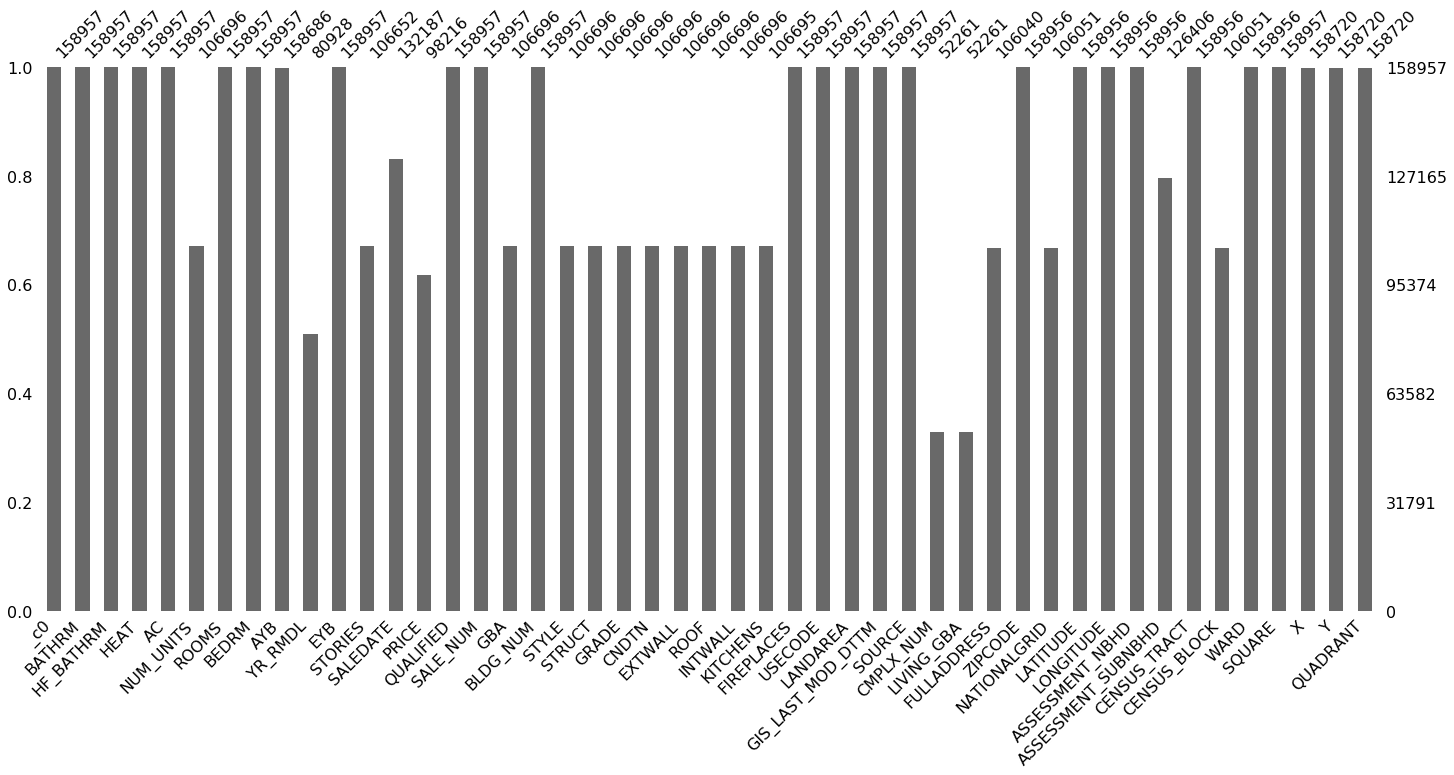

In [15]:
# barchart of how many cells have data in them
msno.bar(py_df)

A lot of the data is missing, around 40% for several categories.

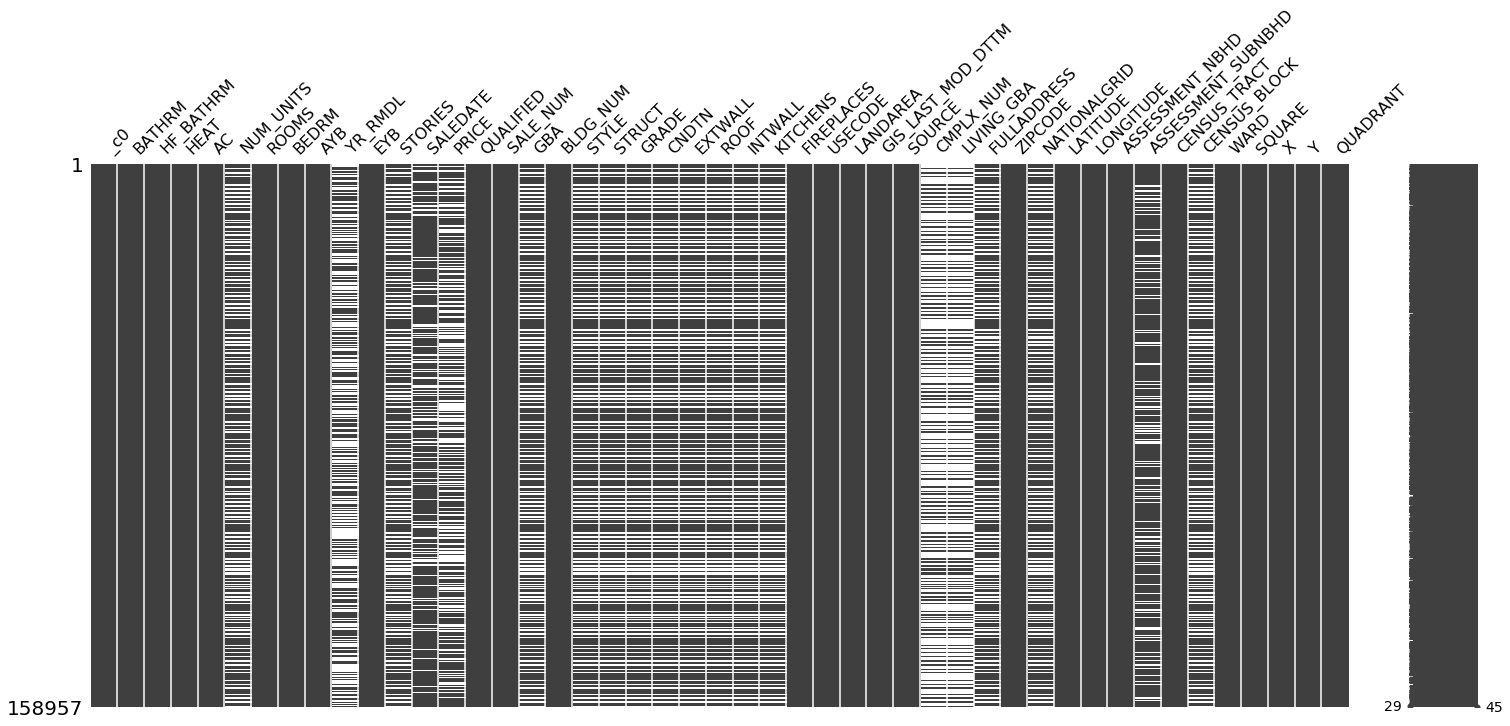

In [16]:
# How do NULLs propogate throughout the dataset?
msno.matrix(py_df)

Nulls seem to be tied to property type. 
Lets see what happens when they are dropped.

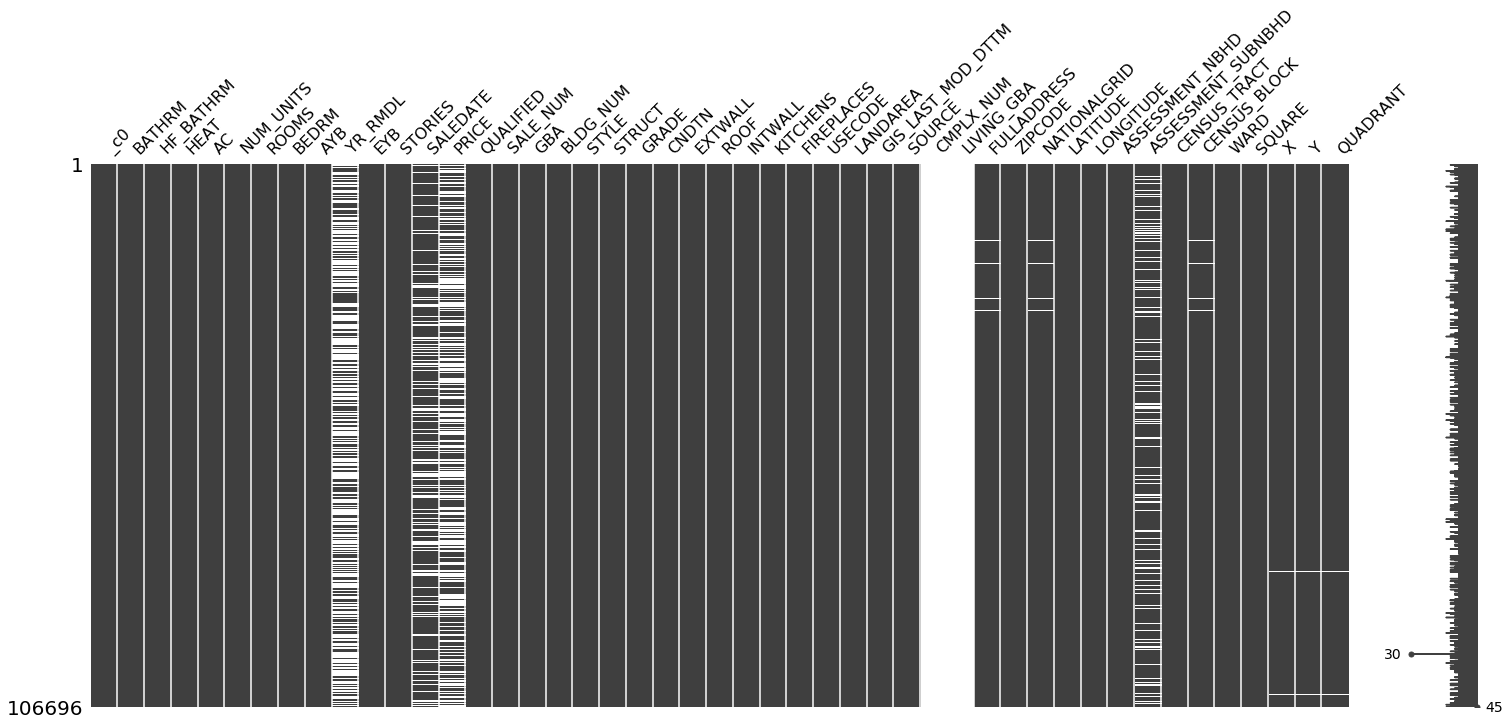

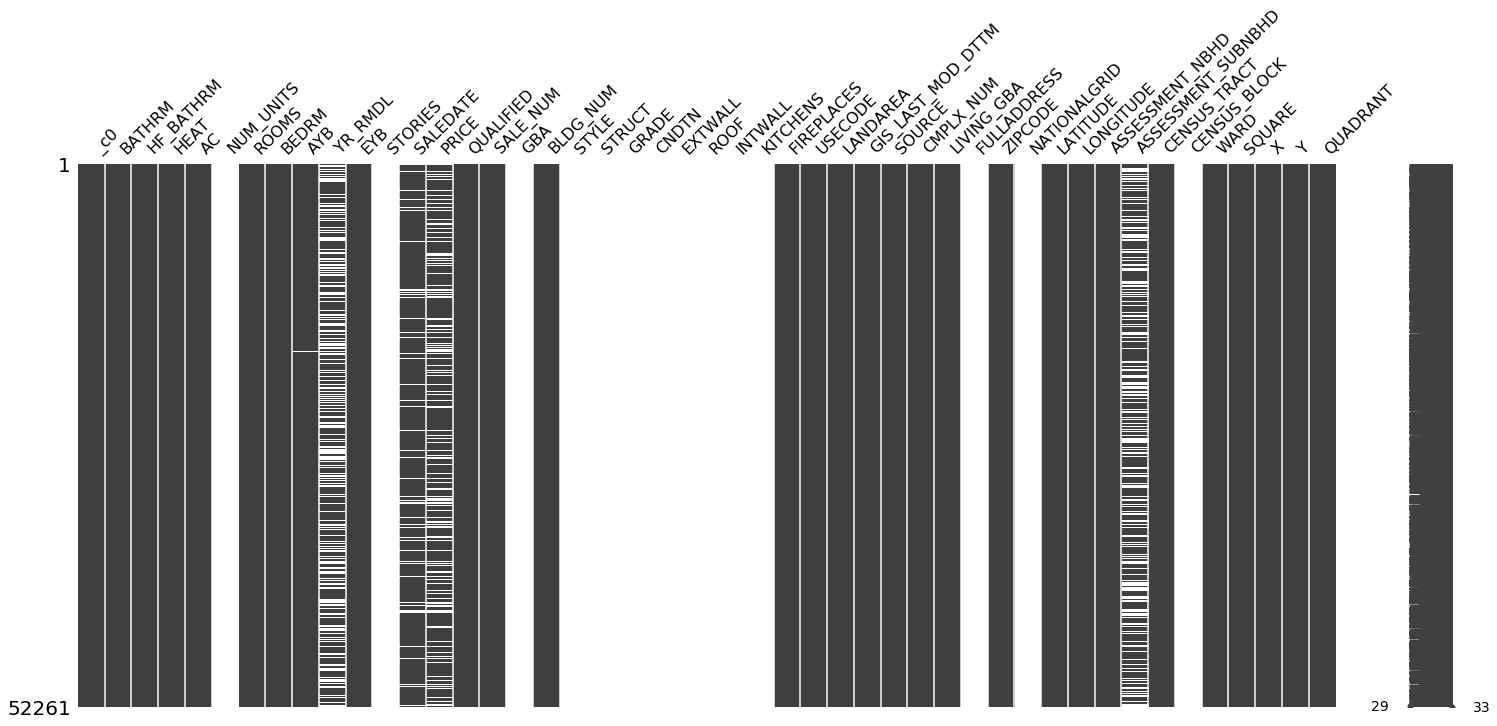

In [17]:
# limiting data to where sq.ft. exists
py_GBA = df.where(~F.col("GBA").isNull()).toPandas()
py_LVG_GBA = df.where(~F.col("LIVING_GBA").isNull()).toPandas()
msno.matrix(py_GBA)
msno.matrix(py_LVG_GBA)

In [18]:
GBA = df.where(~F.col("GBA").isNull())
GBA.show(10)

+-----+------+---------+--------------+---+---------+-----+-----+------+-------+----+-------+-------------------+--------+---------+--------+------+--------+-------+----------+-------------+-------+------------+------------+-------------+--------+----------+-------+--------+-------------------+-----------+---------+----------+--------------------+-------+------------------+-----------+------------------+---------------+--------------------+------------+------------+------+------+------------------+------------------+--------+
|  _c0|BATHRM|HF_BATHRM|          HEAT| AC|NUM_UNITS|ROOMS|BEDRM|   AYB|YR_RMDL| EYB|STORIES|           SALEDATE|   PRICE|QUALIFIED|SALE_NUM|   GBA|BLDG_NUM|  STYLE|    STRUCT|        GRADE|  CNDTN|     EXTWALL|        ROOF|      INTWALL|KITCHENS|FIREPLACES|USECODE|LANDAREA|  GIS_LAST_MOD_DTTM|     SOURCE|CMPLX_NUM|LIVING_GBA|         FULLADDRESS|ZIPCODE|      NATIONALGRID|   LATITUDE|         LONGITUDE|ASSESSMENT_NBHD|  ASSESSMENT_SUBNBHD|CENSUS_TRACT|CENSUS_BLOC

In [19]:
GBA_test = df.where(F.col('SOURCE') == "Residential")
GBA_test.show(5)

+-----+------+---------+--------------+---+---------+-----+-----+------+-------+----+-------+-------------------+--------+---------+--------+------+--------+-------+----------+-------------+-------+------------+----------+--------+--------+----------+-------+--------+-------------------+-----------+---------+----------+-------------------+-------+------------------+-----------+------------------+---------------+------------------+------------+------------+------+------+------------------+------------------+--------+
|  _c0|BATHRM|HF_BATHRM|          HEAT| AC|NUM_UNITS|ROOMS|BEDRM|   AYB|YR_RMDL| EYB|STORIES|           SALEDATE|   PRICE|QUALIFIED|SALE_NUM|   GBA|BLDG_NUM|  STYLE|    STRUCT|        GRADE|  CNDTN|     EXTWALL|      ROOF| INTWALL|KITCHENS|FIREPLACES|USECODE|LANDAREA|  GIS_LAST_MOD_DTTM|     SOURCE|CMPLX_NUM|LIVING_GBA|        FULLADDRESS|ZIPCODE|      NATIONALGRID|   LATITUDE|         LONGITUDE|ASSESSMENT_NBHD|ASSESSMENT_SUBNBHD|CENSUS_TRACT|CENSUS_BLOCK|  WARD|SQUARE|    

In [0]:
print(GBA.count())
print(GBA_test.count())

106696
106696


In [20]:
LIVING_GBA = df.where(~F.col("LIVING_GBA").isNull())
LIVING_GBA.show(10)

+------+------+---------+-------------+---+---------+-----+-----+------+-------+----+-------+-------------------+--------+---------+--------+----+--------+-----+------+-----+-----+-------+----+-------+--------+----------+-------+--------+-------------------+-----------+---------+----------+-----------+-------+------------+------------------+------------------+----------------+--------------------+------------+------------+------+------+------------------+------------------+--------+
|   _c0|BATHRM|HF_BATHRM|         HEAT| AC|NUM_UNITS|ROOMS|BEDRM|   AYB|YR_RMDL| EYB|STORIES|           SALEDATE|   PRICE|QUALIFIED|SALE_NUM| GBA|BLDG_NUM|STYLE|STRUCT|GRADE|CNDTN|EXTWALL|ROOF|INTWALL|KITCHENS|FIREPLACES|USECODE|LANDAREA|  GIS_LAST_MOD_DTTM|     SOURCE|CMPLX_NUM|LIVING_GBA|FULLADDRESS|ZIPCODE|NATIONALGRID|          LATITUDE|         LONGITUDE| ASSESSMENT_NBHD|  ASSESSMENT_SUBNBHD|CENSUS_TRACT|CENSUS_BLOCK|  WARD|SQUARE|                 X|                 Y|QUADRANT|
+------+------+---------

In [22]:
condo = df.where(F.col('SOURCE') == "Condominium")
condo.show(5)

+------+------+---------+-------------+---+---------+-----+-----+------+-------+----+-------+-------------------+--------+---------+--------+----+--------+-----+------+-----+-----+-------+----+-------+--------+----------+-------+--------+-------------------+-----------+---------+----------+-----------+-------+------------+------------------+------------------+----------------+--------------------+------------+------------+------+------+------------------+------------------+--------+
|   _c0|BATHRM|HF_BATHRM|         HEAT| AC|NUM_UNITS|ROOMS|BEDRM|   AYB|YR_RMDL| EYB|STORIES|           SALEDATE|   PRICE|QUALIFIED|SALE_NUM| GBA|BLDG_NUM|STYLE|STRUCT|GRADE|CNDTN|EXTWALL|ROOF|INTWALL|KITCHENS|FIREPLACES|USECODE|LANDAREA|  GIS_LAST_MOD_DTTM|     SOURCE|CMPLX_NUM|LIVING_GBA|FULLADDRESS|ZIPCODE|NATIONALGRID|          LATITUDE|         LONGITUDE| ASSESSMENT_NBHD|  ASSESSMENT_SUBNBHD|CENSUS_TRACT|CENSUS_BLOCK|  WARD|SQUARE|                 X|                 Y|QUADRANT|
+------+------+---------

In [23]:
print(LIVING_GBA.count())
print(condo.count())

52261
52261


> dataframes `GBA_test` & `condo` show that the `NULL`s are mostly tied to building type i.e. `col('SOURCE')`

##### *for later*: splitting the SALEDATE timestamp


In [0]:
t = df\
  .select("*", F.unix_timestamp(F.col('SALEDATE'), 'yyyy-MM-dd HH:mm:ss').alias('ut'))\
  .select("*", F.from_unixtime('ut').alias('dty'))\
  .select("*", F.date_format('SALEDATE', 'yyyy').alias('SALE_YR'),
          F.date_format('SALEDATE', 'MM').alias('SALE_MO'),
          F.date_format('SALEDATE', 'dd').alias('SALE_D'))

t = t.drop('ut', 'dty')

In [25]:
GBA_clean = GBA.where(~F.col("PRICE").isNull())
condo_clean = condo.where(~F.col("PRICE").isNull())
print(GBA_clean.count())
print(condo_clean.count())


57900
40316


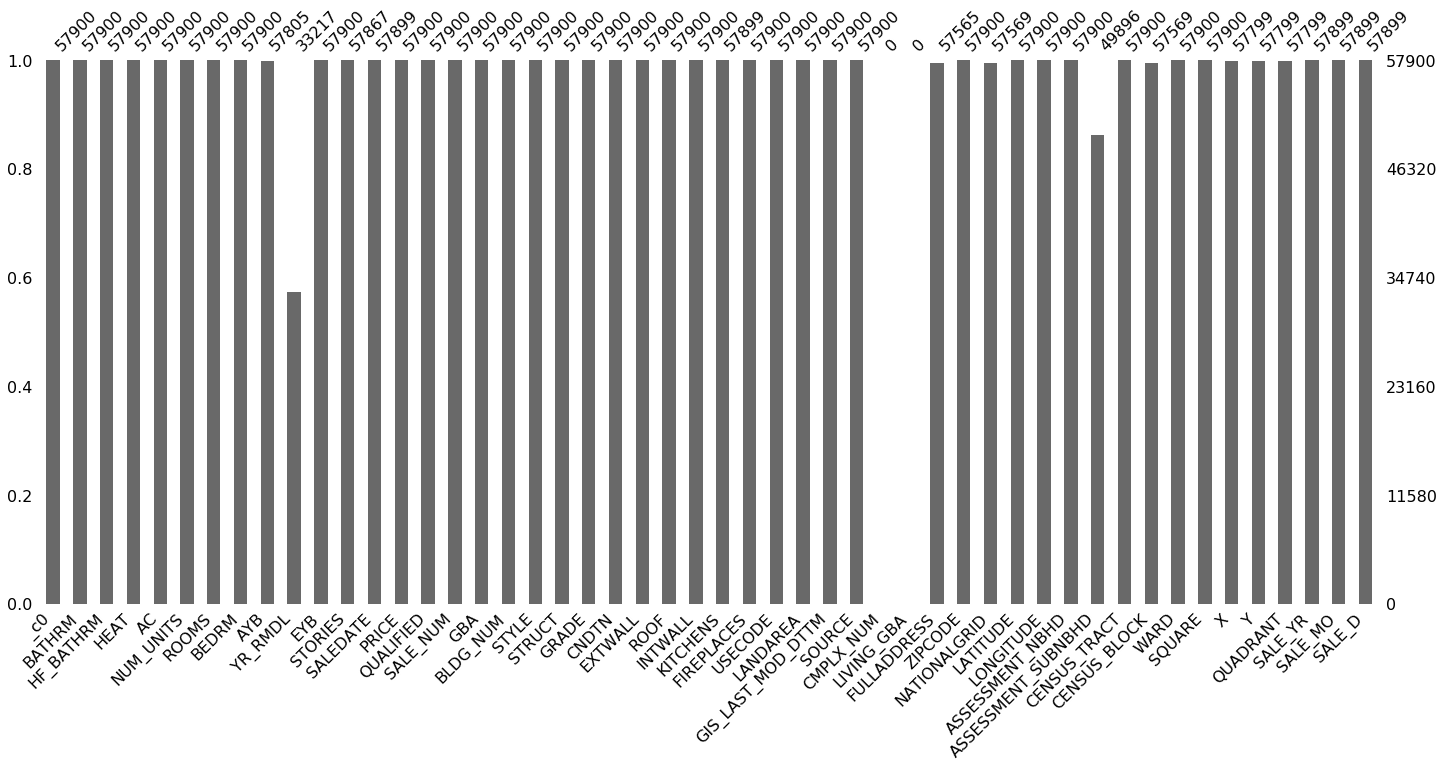

In [30]:
gba = t.where(~F.col("GBA").isNull())
GBA_PRICE = gba.where(~F.col("PRICE").isNull())
py_GBA_PRICE = GBA_PRICE.toPandas()

msno.bar(py_GBA_PRICE)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/di

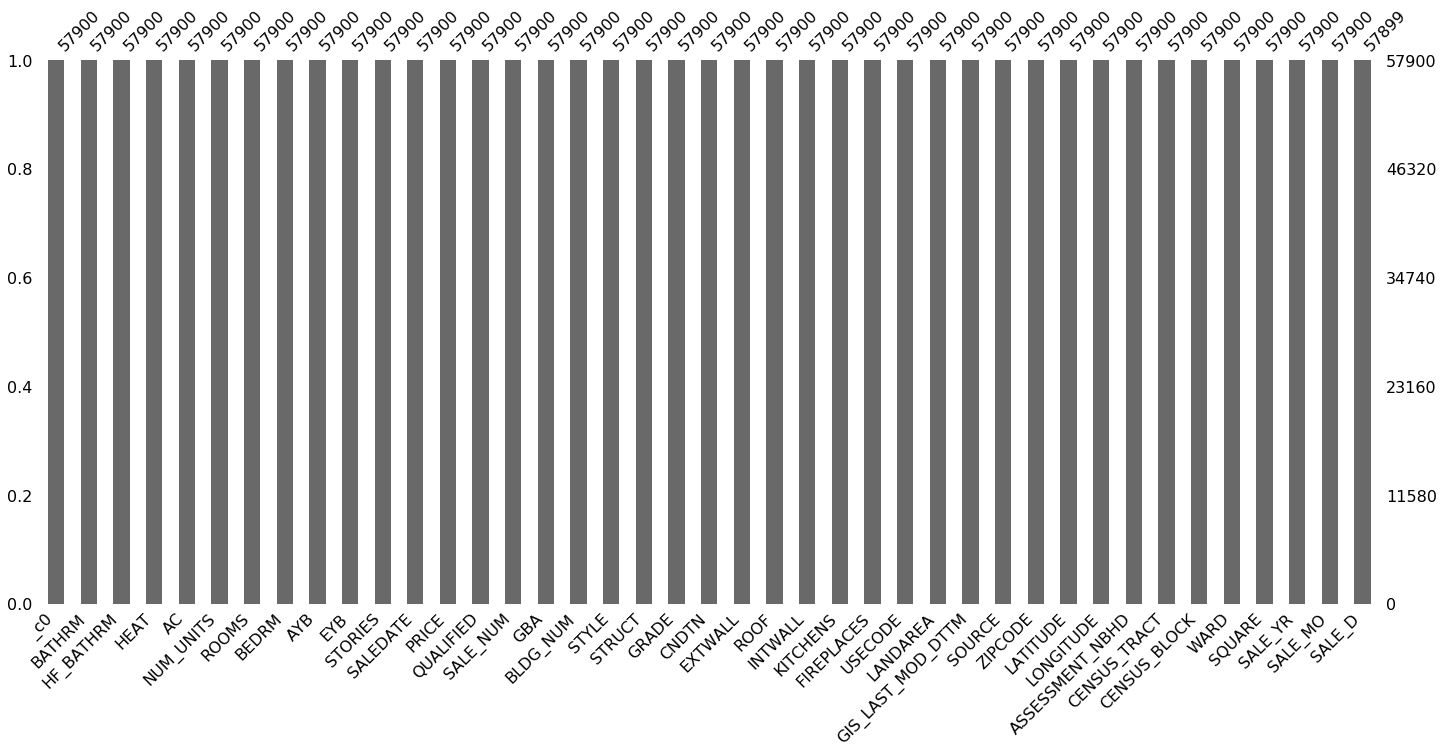

In [69]:
# Dropping columns which are "too far gone" or uneccessary
house = GBA_PRICE.drop('YR_RMDL', 'CMPLX_NUM', 'LIVING_GBA',
            'FULLADDRESS', 'CITY', 'STATE', 
            'NATIONALGRID', 'ASSESSMENT_SUBNBHD', 'X',
            'Y', 'QUADRANT')

d = house.toPandas()


# fill in the rest
d.AYB[d.AYB.isnull()] =  d.AYB.mode().iloc[0]
d.EYB[d.EYB.isnull()] =  d.EYB.mode().iloc[0]
d.STORIES[d.STORIES.isnull()] =  d.STORIES.mode().iloc[0]
d.SALEDATE[d.SALEDATE.isnull()] =  d.SALEDATE.mode().iloc[0]
d.KITCHENS[d.KITCHENS.isnull()] =  d.KITCHENS.mode().iloc[0]
d.CENSUS_BLOCK[d.CENSUS_BLOCK.isnull()] =  d.CENSUS_BLOCK.mode().iloc[0]
d.WARD[d.WARD.isnull()] =  d.WARD.mode().iloc[0]
d.SALE_YR[d.SALE_YR.isnull()] =  d.SALE_YR.mode().iloc[0]
d.SALE_MO[d.SALE_MO.isnull()] =  d.SALE_MO.mode().iloc[0]

msno.bar(d)

##### No `NULL`s with little or no data replaced, but now 57,900 vs. original 158,957 rows (~36%).

In [70]:
house.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- BATHRM: integer (nullable = true)
 |-- HF_BATHRM: integer (nullable = true)
 |-- HEAT: string (nullable = true)
 |-- AC: string (nullable = true)
 |-- NUM_UNITS: double (nullable = true)
 |-- ROOMS: integer (nullable = true)
 |-- BEDRM: integer (nullable = true)
 |-- AYB: double (nullable = true)
 |-- EYB: integer (nullable = true)
 |-- STORIES: double (nullable = true)
 |-- SALEDATE: timestamp (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- QUALIFIED: string (nullable = true)
 |-- SALE_NUM: integer (nullable = true)
 |-- GBA: double (nullable = true)
 |-- BLDG_NUM: integer (nullable = true)
 |-- STYLE: string (nullable = true)
 |-- STRUCT: string (nullable = true)
 |-- GRADE: string (nullable = true)
 |-- CNDTN: string (nullable = true)
 |-- EXTWALL: string (nullable = true)
 |-- ROOF: string (nullable = true)
 |-- INTWALL: string (nullable = true)
 |-- KITCHENS: double (nullable = true)
 |-- FIREPLACES: integer (nullable = tru

### Incorporating Census data into cleaned data

In [41]:
!wget -q https://github.com/elieric/is843/raw/master/raw_census_tracts_in_2010.csv
censusdata=spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("raw_census_tracts_in_2010.csv")
print('done')

done


In [42]:
# censusdata = spark.read.format("csv")\
#   .option("header", "true")\
#   .option("inferSchema", "true")\
#   .load(data + "raw_census_tracts_in_2010.csv")
censusdata.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- TRACT: integer (nullable = true)
 |-- GEOID: long (nullable = true)
 |-- P0010001: integer (nullable = true)
 |-- P0010002: integer (nullable = true)
 |-- P0010003: integer (nullable = true)
 |-- P0010004: integer (nullable = true)
 |-- P0010005: integer (nullable = true)
 |-- P0010006: integer (nullable = true)
 |-- P0010007: integer (nullable = true)
 |-- P0010008: integer (nullable = true)
 |-- OP000001: integer (nullable = true)
 |-- OP000002: integer (nullable = true)
 |-- OP000003: integer (nullable = true)
 |-- OP000004: integer (nullable = true)
 |-- P0020002: integer (nullable = true)
 |-- P0020005: integer (nullable = true)
 |-- P0020006: integer (nullable = true)
 |-- P0020007: integer (nullable = true)
 |-- P0020008: integer (nullable = true)
 |-- P0020009: integer (nullable = true)
 |-- P0020010: integer (nullable = true)
 |-- OP00005: integer (nullable = true)
 |-- OP00006: integer (nullable = true)
 |-- OP00007: integer 

In [43]:
censusdata.show(5)

+--------+-----+-----------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+------------+----------+----------------+----------------+---------------+----------------+---------------+----------------+---------------+----------------+---------------+----------------+---------------+----------------+---------------+----------------+
|OBJECTID|TRACT|      GEOID|P0010001|P0010002|P0010003|P0010004|P0010005|P0010006|P0010007|P0010008|OP000001|OP000002|OP000003|OP000004|P0020002|P0020005|P0020006|P0020007|P0020008|P0020009|P0020010|OP00005|OP00006|OP00007|OP00008|P0030001|P0030003|P0030004|P0030005|P0030006|P0030007|P00300

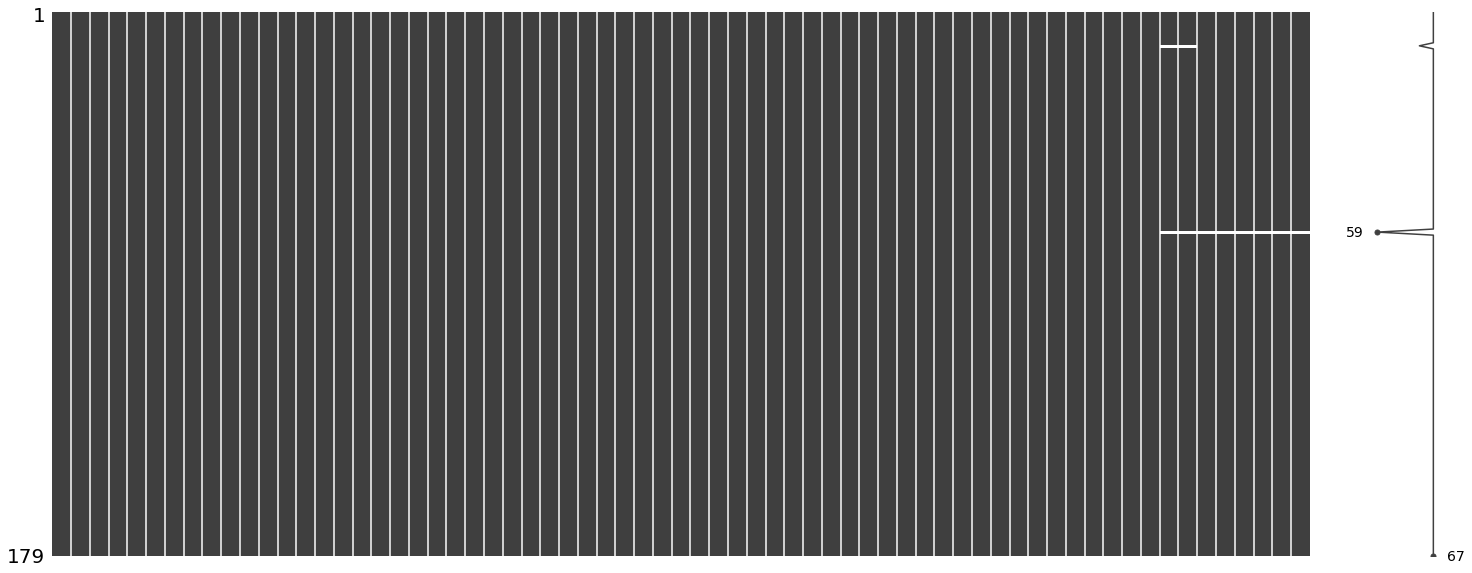

In [44]:
# NULLs here too?
py_censusdata = censusdata.toPandas()
msno.matrix(py_censusdata)

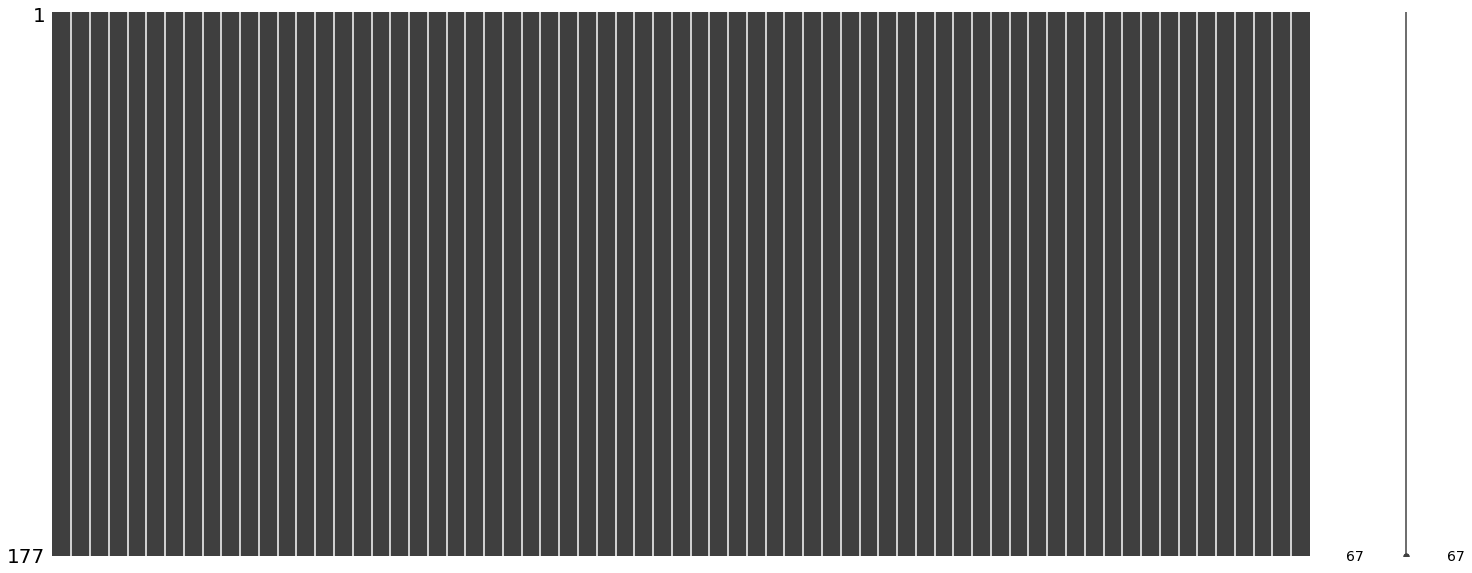

In [45]:
# whoops, step#2
censusdata = censusdata.na.drop()
py_censusdata = censusdata.toPandas()
msno.matrix(py_censusdata)

In [0]:
house.createOrReplaceTempView("house")
censusdata.createOrReplaceTempView("censusdata")

In [0]:
dfcd = house.join(censusdata, 
            on = house["CENSUS_TRACT"] == censusdata['TRACT'],
            how = "left")

In [74]:
dfcd.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- BATHRM: integer (nullable = true)
 |-- HF_BATHRM: integer (nullable = true)
 |-- HEAT: string (nullable = true)
 |-- AC: string (nullable = true)
 |-- NUM_UNITS: double (nullable = true)
 |-- ROOMS: integer (nullable = true)
 |-- BEDRM: integer (nullable = true)
 |-- AYB: double (nullable = true)
 |-- EYB: integer (nullable = true)
 |-- STORIES: double (nullable = true)
 |-- SALEDATE: timestamp (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- QUALIFIED: string (nullable = true)
 |-- SALE_NUM: integer (nullable = true)
 |-- GBA: double (nullable = true)
 |-- BLDG_NUM: integer (nullable = true)
 |-- STYLE: string (nullable = true)
 |-- STRUCT: string (nullable = true)
 |-- GRADE: string (nullable = true)
 |-- CNDTN: string (nullable = true)
 |-- EXTWALL: string (nullable = true)
 |-- ROOF: string (nullable = true)
 |-- INTWALL: string (nullable = true)
 |-- KITCHENS: double (nullable = true)
 |-- FIREPLACES: integer (nullable = tru

In [53]:
dfcd.show()

+---+------+---------+-------------+---+---------+-----+-----+------+-------+----+-------+-------------------+---------+---------+--------+------+--------+-------+-------------+-------------+---------+------------+----------+--------+--------+----------+-------+--------+-------------------+-----------+---------+----------+--------------------+----------+-----+-------+------------------+------------------+------------+---------------+------------------+------------+------------+------+------+------------------+------------------+--------+--------+-----+-----------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+------

In [75]:
house.count()

57900

#### Summary of the column PRICE using describe()

In [76]:
house.describe(['PRICE']).show()

+-------+-----------------+
|summary|            PRICE|
+-------+-----------------+
|  count|            57900|
|   mean|579911.8997927461|
| stddev| 607645.395956856|
|    min|              1.0|
|    max|           2.51E7|
+-------+-----------------+



#### Use data after Year 2000

In [81]:
from pyspark.sql import functions as F

df_new = dfcd.where(F.year("SALEDATE") >= 2000)
df_new.describe(['PRICE']).show()

+-------+-----------------+
|summary|            PRICE|
+-------+-----------------+
|  count|            51071|
|   mean|626709.6479411016|
| stddev|627000.8169204495|
|    min|              1.0|
|    max|           2.51E7|
+-------+-----------------+



#### Use statistics methods to exclude the outliers

In [0]:
from pyspark.sql.functions import mean, stddev

df_new = dfcd.where(F.year("SALEDATE") >= 2000)

# Calculate values used for outlier filtering
mean_val = df_new.agg({'PRICE': 'mean'}).collect()[0][0]
stddev_val = df_new.agg({'PRICE': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df_new = df_new.where((df_new['PRICE'] < hi_bound) & (df_new['PRICE'] > low_bound))

In [83]:
df_new.describe(['PRICE']).show()

+-------+-----------------+
|summary|            PRICE|
+-------+-----------------+
|  count|            50390|
|   mean|580803.5393728914|
| stddev|406996.6288912186|
|    min|              1.0|
|    max|        2505000.0|
+-------+-----------------+



#### Average price grouped by rooms?

In [85]:
df_new.groupBy("ROOMS").avg("PRICE").orderBy("ROOMS").show()

+-----+------------------+
|ROOMS|        avg(PRICE)|
+-----+------------------+
|    0|       340397.8125|
|    1|           56130.0|
|    2| 388525.7894736842|
|    3|412834.41414141416|
|    4| 391291.3054318789|
|    5| 378214.4405449088|
|    6|455416.86231615377|
|    7| 544970.6694627522|
|    8| 671419.8040320561|
|    9| 813611.0380465644|
|   10| 887406.8715536814|
|   11|1059847.9799235181|
|   12| 766282.6992632285|
|   13| 1205726.525083612|
|   14| 975188.0045454545|
|   15|1205247.1623931625|
|   16|413486.47747747746|
|   17| 941642.8571428572|
|   18|        560261.875|
|   19|          889810.0|
+-----+------------------+
only showing top 20 rows



#### Date range of house

In [86]:
df_new.selectExpr("min(EYB)", "max(EYB)").show()

+--------+--------+
|min(EYB)|max(EYB)|
+--------+--------+
|    1915|    2018|
+--------+--------+



#### Average price grouped by LAND AREA?

In [87]:
df_new.groupBy("LANDAREA").avg("PRICE").orderBy("LANDAREA").show()

+--------+-----------------+
|LANDAREA|       avg(PRICE)|
+--------+-----------------+
|       0|        1410434.1|
|     255|         210000.0|
|     268|         664150.0|
|     281|         590000.0|
|     288|         511000.0|
|     294|         387000.0|
|     327|427333.3333333333|
|     331|         660000.0|
|     350|         597500.0|
|     353|         650000.0|
|     356|         582000.0|
|     357|         567500.0|
|     360|         730000.0|
|     361|         690000.0|
|     362|         599100.0|
|     365|         729000.0|
|     374|         499000.0|
|     378|361333.3333333333|
|     397|         384300.0|
|     399|         519000.0|
+--------+-----------------+
only showing top 20 rows



#### Average price grouped by Source of house and Condition?

In [90]:
from pyspark.sql import functions as F

df_new.groupBy("SOURCE","CNDTN").avg("PRICE").orderBy(F.desc("avg(PRICE)")).show()

+-----------+---------+------------------+
|     SOURCE|    CNDTN|        avg(PRICE)|
+-----------+---------+------------------+
|Residential|Very Good| 791304.6786644951|
|Residential|Excellent| 765663.3324641461|
|Residential|     Good| 659323.3904341927|
|Residential|  Default|          499000.0|
|Residential|  Average|417289.55742686446|
|Residential|     Poor|360443.04938271607|
|Residential|     Fair| 347990.2044887781|
+-----------+---------+------------------+



#### Average price grouped by Quadrant of house location in washington DC city?

In [0]:
#df.groupBy("QUADRANTå").avg("PRICE").show()

#### How many house types are there based on Structure?

In [93]:
df_new.select("STRUCT").distinct().count()

9

In [94]:
df_new.groupBy("STRUCT", "STYLE").count().orderBy("STYLE").show()

+-------------+---------------+-----+
|       STRUCT|          STYLE|count|
+-------------+---------------+-----+
|         null|           null|38027|
|   Row Inside|        1 Story|   27|
|Semi-Detached|        1 Story|   45|
|      Row End|        1 Story|   15|
|       Single|        1 Story| 1638|
|        Multi|        1 Story|    6|
|   Row Inside|  1.5 Story Fin|   14|
|Semi-Detached|  1.5 Story Fin|   27|
|        Multi|  1.5 Story Fin|    1|
|      Row End|  1.5 Story Fin|    2|
|       Single|  1.5 Story Fin|  934|
|Semi-Detached|1.5 Story Unfin|    4|
|      Row End|1.5 Story Unfin|    1|
|       Single|1.5 Story Unfin|   36|
|   Row Inside|1.5 Story Unfin|    2|
|        Multi|1.5 Story Unfin|    4|
|        Multi|        2 Story| 2318|
|      Default|        2 Story|    2|
|  Town Inside|        2 Story|   99|
|       Single|        2 Story| 7800|
+-------------+---------------+-----+
only showing top 20 rows



#### Comparison of house price based on year and strcuture type

In [98]:
df_new.groupBy("STRUCT").avg("PRICE").orderBy(F.desc("avg(PRICE)")).show()

+-------------+------------------+
|       STRUCT|        avg(PRICE)|
+-------------+------------------+
|      Default|         1016250.0|
|       Single| 710096.9454231951|
|   Row Inside| 588448.2909281995|
|      Row End| 575307.4983692107|
|     Town End| 414317.1052631579|
|  Town Inside|399895.26086956525|
|Semi-Detached|398752.62302138295|
|        Multi| 384621.6578112609|
+-------------+------------------+



## Visualization

### Find the trends for property sales by year. 

#### analysis the total sales count, average price and totoal sales value by each year.


In [100]:
from pyspark.sql import functions as F
sales_for_each_year = df_new.groupBy(F.year("SALEDATE").alias("Year"))\
                        .agg(F.count("_c0").alias("sales_count"),F.avg("PRICE").alias("avg_price"))\
                        .where(F.col("Year") >= 2000)\
                        .where(F.col("Year") <= 2017)\
                        .orderBy(F.desc("Year"))
sales_for_each_year.show()

+----+-----------+------------------+
|Year|sales_count|         avg_price|
+----+-----------+------------------+
|2017|       5215| 735048.2527325024|
|2016|       4182| 727581.2539454807|
|2015|       3788| 710220.4538014784|
|2014|       3454| 662188.9551244933|
|2013|       3221| 655933.4166407948|
|2012|       2753| 606756.0468579731|
|2011|       2475| 545346.4892929293|
|2010|       2334| 537998.8723221937|
|2009|       2181| 511925.3140761119|
|2008|       1745| 549053.5111747851|
|2007|       2089|  555421.049305888|
|2006|       2007| 529543.4394618834|
|2005|       2213| 532055.8350655219|
|2004|       2329| 425050.2232717905|
|2003|       1981|393309.25088339223|
|2002|       1911| 326075.0654107797|
|2001|       1799| 291235.3401889939|
|2000|       1634|257052.68727050183|
+----+-----------+------------------+



In [101]:
py_dc_data = sales_for_each_year.toPandas()
py_dc_data.head()

,Year,sales_count,avg_price
0,2017,5215,735048.252733
1,2016,4182,727581.253945
2,2015,3788,710220.453801
3,2014,3454,662188.955124
4,2013,3221,655933.416641


#### Use *matplotlib* for plotting

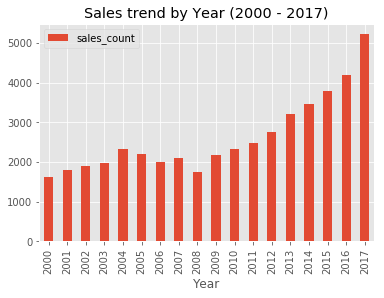

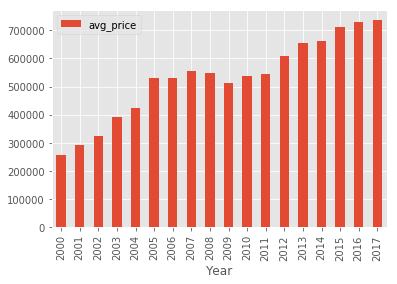

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df1 = py_dc_data.set_index('Year')
df1[["sales_count" ]].plot.bar().invert_xaxis()
plt.title('Sales trend by Year (2000 - 2017)')
df1[["avg_price" ]].plot.bar().invert_xaxis()

In [104]:
sales_for_each_month = df.groupBy(F.month("SALEDATE").alias("Month"))\
                        .agg(F.count("_c0").alias("sales_count"),F.avg("PRICE").alias("avg_price"))\
                        .where(F.col("Month") >= 1)\
                        .orderBy(F.asc("Month"))
sales_for_each_month.show()

+-----+-----------+------------------+
|Month|sales_count|         avg_price|
+-----+-----------+------------------+
|    1|       6237| 537301.7816257817|
|    2|       5408| 520972.5208949704|
|    3|       7204| 520356.0170738479|
|    4|       7466| 552525.7781944816|
|    5|       8709| 598910.0548857504|
|    6|       9147|  677354.390291899|
|    7|       8496| 580499.0936911488|
|    8|       7908| 545078.6920839656|
|    9|       7063|512655.98088630894|
|   10|       7257|  528202.349042304|
|   11|       6715| 546254.5313477289|
|   12|       7485| 546267.8710754843|
+-----+-----------+------------------+



#### Find the trends for property sales by month.

Text(0.5, 1.0, 'Sales trend by month')

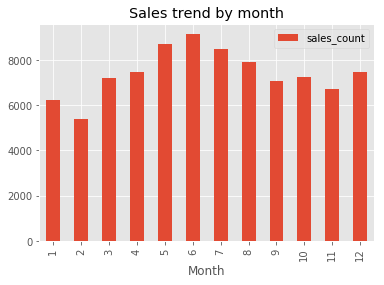

In [105]:
py_dc_data3 = sales_for_each_month.toPandas()
py_dc_data3.head()
df3 = py_dc_data3.set_index('Month')
df3[["sales_count"]].plot.bar()
plt.title('Sales trend by month')

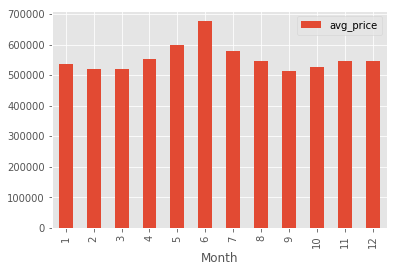

In [106]:
df3[["avg_price"]].plot.bar()

#### Average sales price per ward

In [107]:
sales_each_ward = df.groupBy(F.col("WARD"))\
                        .agg(F.avg("PRICE").alias("avg_price"))\
                        .where(F.col("WARD") != 'null')\
                        .orderBy(F.desc("avg_price"))
sales_each_ward.show()

+------+------------------+
|  WARD|         avg_price|
+------+------------------+
|Ward 3| 839629.5452536825|
|Ward 2|  727044.121484099|
|Ward 1|  598494.686404066|
|Ward 6| 556249.8941489361|
|Ward 4| 531690.7880845367|
|Ward 5| 415715.8010638298|
|Ward 8|278615.91025198484|
|Ward 7| 247307.5319199904|
+------+------------------+



In [108]:
py_dc_data2 = sales_each_ward.toPandas()
py_dc_data2.head()

,WARD,avg_price
0,Ward 3,839629.545254
1,Ward 2,727044.121484
2,Ward 1,598494.686404
3,Ward 6,556249.894149
4,Ward 4,531690.788085


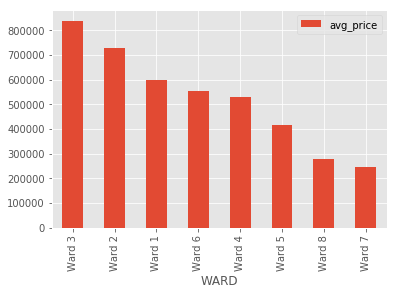

In [109]:
df2 = py_dc_data2.set_index('WARD')
df2[["avg_price"]].plot.bar()

Ward 3 has most avg_price in D.C.

## Sampling & Scatterplot
sample 5% of the data to plot a scatterplot:

In [119]:
df_sample = df_new.sample(withReplacement = False, fraction = 0.05, seed = 8)

# Convert to Pandas
py_df_sample = df_sample.toPandas()

py_df_sample.head()

,_c0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,...,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015
0,59702,3,0,Forced Air,Y,1.0,7,4,1895.0,1967,...,8.244564e+07,51120.0,67070893,46580.5,7.654478e+07,49236.0,8.441106e+07,55925.0,98091822.0,61645.0
1,70890,3,1,Warm Cool,Y,1.0,12,7,1905.0,1969,...,9.606741e+07,47415.0,89517062,46693.0,9.642238e+07,47221.0,1.165576e+08,54943.0,124565445.0,57282.5
2,94814,1,2,Warm Cool,Y,1.0,6,3,1952.0,1964,...,6.839131e+07,49969.0,72050910,48382.0,7.159753e+07,51018.5,7.528196e+07,52425.0,78879964.0,51745.0
3,50628,1,1,Hot Water Rad,N,1.0,8,3,1913.0,1943,...,1.119406e+08,28176.5,100905873,27449.5,1.075708e+08,27870.5,1.128889e+08,29257.0,126189873.0,30443.0
4,42389,3,0,Forced Air,Y,1.0,10,5,1964.0,1981,...,1.201610e+08,74993.5,137593664,78133.0,1.507125e+08,79794.0,1.643907e+08,82203.0,170973446.0,81819.0


Draw plot on housing sales count by location

No handles with labels found to put in legend.


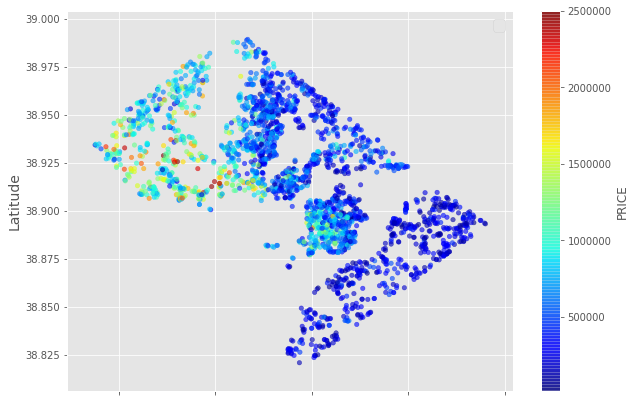

In [120]:
py_df_sample.plot(kind="scatter", x="LONGITUDE", y="LATITUDE",
    c="PRICE", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.6, figsize=(10,7),
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

Compare with Washington D.C Map

<img src="https://raw.githubusercontent.com/elieric/is843/master/DC-Ward-Public-Trans.jpg" width="300" align="left"/>

### Regressions

#### Preparing Data

In [134]:
d.columns

Index(['_c0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD',
       'SQUARE', 'SALE_YR', 'SALE_MO', 'SALE_D'],
      dtype='object')

In [0]:
dc = d

In [137]:
dc = dc.drop(['SALEDATE', 'GIS_LAST_MOD_DTTM', '_c0', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'SQUARE', 'SALE_D'], axis=1)
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57900 entries, 0 to 57899
Data columns (total 34 columns):
BATHRM             57900 non-null int32
HF_BATHRM          57900 non-null int32
HEAT               57900 non-null object
AC                 57900 non-null object
NUM_UNITS          57900 non-null float64
ROOMS              57900 non-null int32
BEDRM              57900 non-null int32
AYB                57900 non-null float64
EYB                57900 non-null int32
STORIES            57900 non-null float64
PRICE              57900 non-null float64
QUALIFIED          57900 non-null object
SALE_NUM           57900 non-null int32
GBA                57900 non-null float64
BLDG_NUM           57900 non-null int32
STYLE              57900 non-null object
STRUCT             57900 non-null object
GRADE              57900 non-null object
CNDTN              57900 non-null object
EXTWALL            57900 non-null object
ROOF               57900 non-null object
INTWALL            57900 non-nul

In [124]:
dc.dtypes

BATHRM               int32
HF_BATHRM            int32
HEAT                object
AC                  object
NUM_UNITS          float64
ROOMS                int32
BEDRM                int32
AYB                float64
EYB                  int32
STORIES            float64
PRICE              float64
QUALIFIED           object
SALE_NUM             int32
GBA                float64
BLDG_NUM             int32
STYLE               object
STRUCT              object
GRADE               object
CNDTN               object
EXTWALL             object
ROOF                object
INTWALL             object
KITCHENS           float64
FIREPLACES           int32
USECODE              int32
LANDAREA             int32
SOURCE              object
ZIPCODE            float64
LATITUDE           float64
LONGITUDE          float64
ASSESSMENT_NBHD     object
WARD                object
SALE_YR             object
SALE_MO             object
SALE_D              object
dtype: object

In [125]:
dc.yr = dc.SALE_YR.astype('int32', copy=False)
dc.mo = dc.SALE_MO.astype('int32', copy=False)
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57900 entries, 0 to 57899
Data columns (total 35 columns):
BATHRM             57900 non-null int32
HF_BATHRM          57900 non-null int32
HEAT               57900 non-null object
AC                 57900 non-null object
NUM_UNITS          57900 non-null float64
ROOMS              57900 non-null int32
BEDRM              57900 non-null int32
AYB                57900 non-null float64
EYB                57900 non-null int32
STORIES            57900 non-null float64
PRICE              57900 non-null float64
QUALIFIED          57900 non-null object
SALE_NUM           57900 non-null int32
GBA                57900 non-null float64
BLDG_NUM           57900 non-null int32
STYLE              57900 non-null object
STRUCT             57900 non-null object
GRADE              57900 non-null object
CNDTN              57900 non-null object
EXTWALL            57900 non-null object
ROOF               57900 non-null object
INTWALL            57900 non-nul

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [0]:
dc = pd.get_dummies(dc, prefix='HEAT_', columns=['HEAT'])
dc = pd.get_dummies(dc, prefix='AC_', columns=['AC'])
dc = pd.get_dummies(dc, prefix='QUALIFIED_', columns=['QUALIFIED'])
dc = pd.get_dummies(dc, prefix='STYLE_', columns=['STYLE'])
dc = pd.get_dummies(dc, prefix='STRUCT_', columns=['STRUCT'])
dc = pd.get_dummies(dc, prefix='GRADE_', columns=['GRADE'])
dc = pd.get_dummies(dc, prefix='CNDTN_', columns=['CNDTN'])
dc = pd.get_dummies(dc, prefix='EXTWALL_', columns=['EXTWALL'])
dc = pd.get_dummies(dc, prefix='ROOF_', columns=['ROOF'])
dc = pd.get_dummies(dc, prefix='INTWALL_', columns=['INTWALL'])
dc = pd.get_dummies(dc, prefix='USECODE_', columns=['USECODE'])
dc = pd.get_dummies(dc, prefix='SOURCE_', columns=['SOURCE'])
dc = pd.get_dummies(dc, prefix='ASSESSMENT_NBHD_', columns=['ASSESSMENT_NBHD'])
dc = pd.get_dummies(dc, prefix='WARD_', columns=['WARD'])

In [0]:
y = dc['PRICE']
X = dc.drop(['PRICE'], axis=1)

In [138]:
print(dc.describe())


             BATHRM     HF_BATHRM     NUM_UNITS         ROOMS         BEDRM  \
count  57900.000000  57900.000000  57900.000000  57900.000000  57900.000000   
mean       2.203437      0.650052      1.221071      7.448307      3.422798   
std        1.063606      0.607150      0.623997      2.307267      1.117695   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      6.000000      3.000000   
50%        2.000000      1.000000      1.000000      7.000000      3.000000   
75%        3.000000      1.000000      1.000000      8.000000      4.000000   
max       12.000000     11.000000      6.000000     31.000000     20.000000   

                AYB           EYB       STORIES         PRICE      SALE_NUM  \
count  57900.000000  57900.000000  57900.000000  5.790000e+04  57900.000000   
mean    1934.523834   1969.799482      2.124596  5.799119e+05      1.855060   
std       30.615893     16.932781      3.947640  6.

# I'm just troubleshooting the DC notebook atm. We need to validate/clarify the below later

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Correlation matrix of all columns

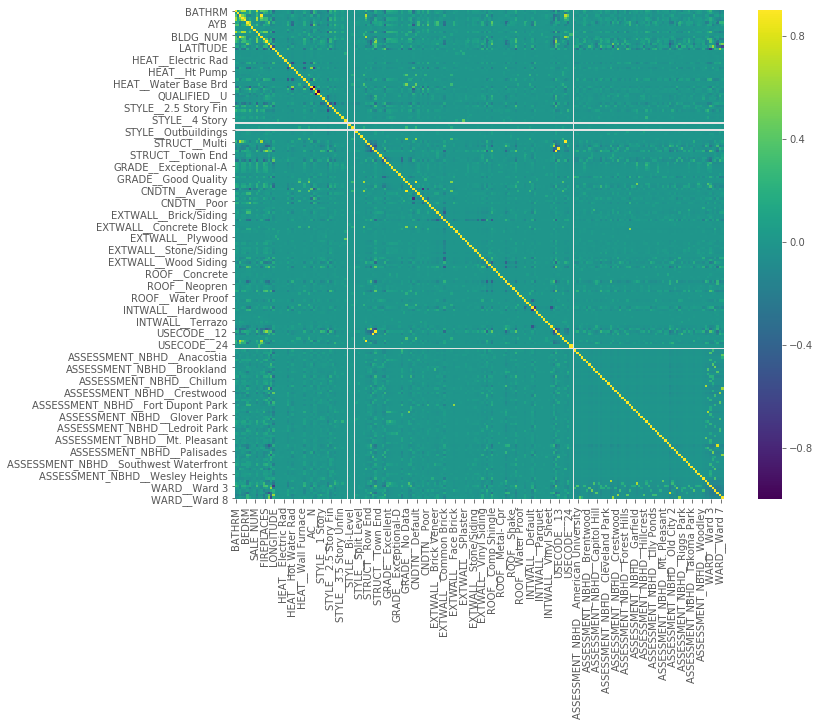

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = X_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = "viridis")
plt.show()

### GBR
from: 
https://www.kaggle.com/ashishaggarwal12/dc-properties#Gradient-Boosting-regression-model-and-prediction-by-tuning-parameters

In [131]:
# step 1
gbr1 = GradientBoostingRegressor(n_estimators=100) 
gbr1.fit(X_train, y_train) 
pred_gbr1=gbr1.predict(X_test)

ValueError: ignored

In [132]:
print("MSE for test",mean_squared_error(y_test,pred_gbr1))
print("R2 for test",r2_score(y_test,pred_gbr1))
print("Train score",gbr1.score(X_train, y_train))
print("Test score",gbr1.score(X_test, y_test))

NameError: ignored